# Концепции Machine Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
### Загружаем датасет phones.csv ###

In [61]:
phones = pd.read_csv("phones.csv")
phones.head(8)

disk       os  price  year
0    64  Android   7256  2016
1   128  Android   7623  2015
2    64  Android   1916  2010
3   512      iOS  15045  2017
4    16  Android   4478  2013
5   512      iOS  15842  2018
6   128  Android   7191  2015
7    64  Android   4277  2013

In [62]:
### Визуализиум загруженный датасета ###

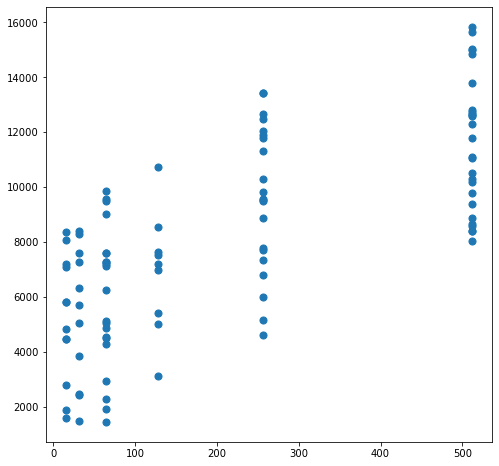

In [63]:
fig = plt.figure(figsize=(8, 8)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["disk"], phones["price"], s=50)

# отображаем картинку
plt.show()

Задание 1: обучить модель регрессии

In [92]:
### Выгружаем в соответствующие переменные выбранные признаки ###
X = phones[["disk", "year"]]
z = phones["os"]
y = phones["price"]
print(X[0:12])
print(y[11:12])

    disk  year
0     64  2016
1    128  2015
2     64  2010
3    512  2017
4     16  2013
5    512  2018
6    128  2015
7     64  2013
8    512  2015
9     64  2015
10   512  2016
11   128  2018
11    10729
Name: price, dtype: int64


In [65]:
### Запуск процесса обучения ###
# импортирт модуля, отвечающий за линейную регрессию
from sklearn.linear_model import LinearRegression

In [93]:
reg = LinearRegression().fit(X, y)
b = reg.coef_
a = reg.intercept_
print([b])
print(a)
reg.predict(X[11:12])[0]

[array([  13.57877662, 1021.27616528])]
-2051913.7442219171


10759.640728447586

Обучение модель классификации

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
### Выгружаем в соответствующие переменные выбранные признаки ###
X = phones[["disk", "price", "year"]]
y = phones["os"]

In [95]:
### Запускаем процесс обучения ###
### демонстрируем работоспобность обученной модели ###

In [96]:
cl = DecisionTreeClassifier().fit(X, y)
print(export_text(cl))
cl.predict(X[3:4])[0], y[3]

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



('iOS', 'iOS')

Обучение модели кластеризации

In [70]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
phones = pd.read_csv("phones.csv")
phones.head(8)


In [71]:
### Запуск процесс обучения ###
### демонстрируем работоспобность обученной модели ###

In [72]:
from sklearn.cluster import KMeans

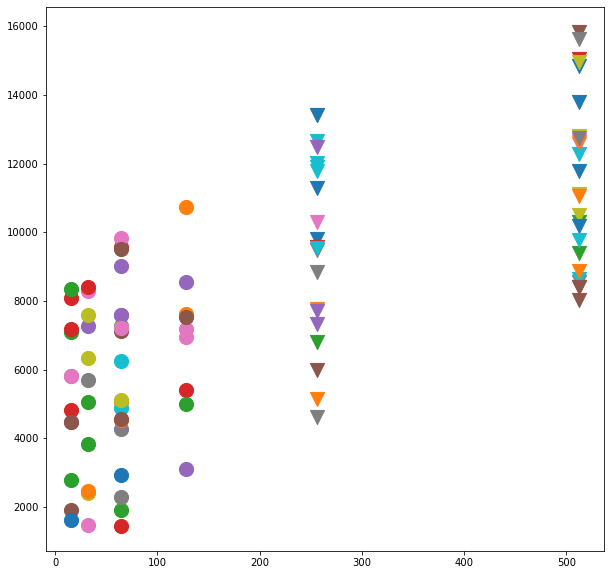

    disk  price  year
0     64   7256  2016
1    128   7623  2015
2     64   1916  2010
3    512  15045  2017
4     16   4478  2013
..   ...    ...   ...
95   512   8398  2011
96    64   7197  2016
97    32   5694  2014
98    32   7589  2016
99   256   9533  2014

[100 rows x 3 columns]


In [73]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, d3, l in zip(phones.disk, phones.price, phones.year, phones.os):
    plt.scatter(d1, d2, s=200, marker=markers[l])

# отображаем картинку
plt.show()
X = phones[["disk", "price", "year"]]
print(X)

In [74]:
clust = KMeans(n_clusters=2).fit(X)
[c1, c2] = clust.cluster_centers_
print(c2)

[  368.    11601.65   2015.525]


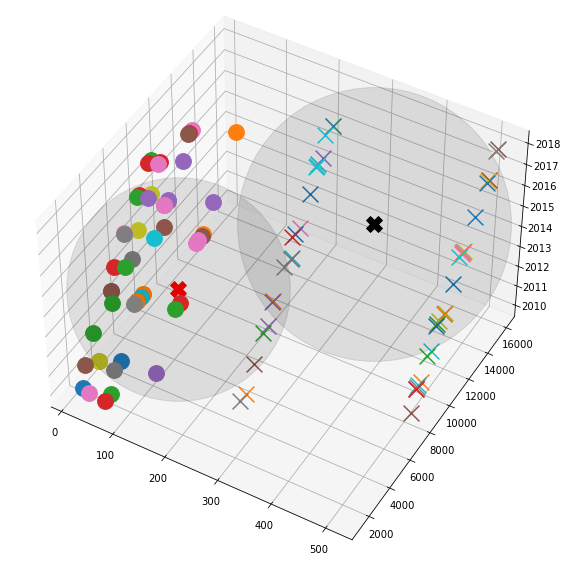

In [98]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

markers = {"Android": "o", "iOS": "x"}
for d1, d2, d3, l in zip(phones.disk, phones.price, phones.year, phones.os):
    ax.scatter(d1, d2, d3, l, s=250, marker=markers[l])
    
# добавляем информацию о центрах кластеров
ax.scatter(c1[0], c1[1], c1[2], s=250, marker="X", c="red")
ax.scatter(c1[0], c1[1], c1[2], s=250 * 2e2, c="black", alpha=0.1)

ax.scatter(c2[0], c2[1], c2[2], s=250, marker="X", c="black")
ax.scatter(c2[0], c2[1], c2[2], s=250 * 3e2, c="black", alpha=0.1)


# отображаем картинку
ax.elev =45
plt.show()